# Supermarket Sales Analysis-EDA

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import Image

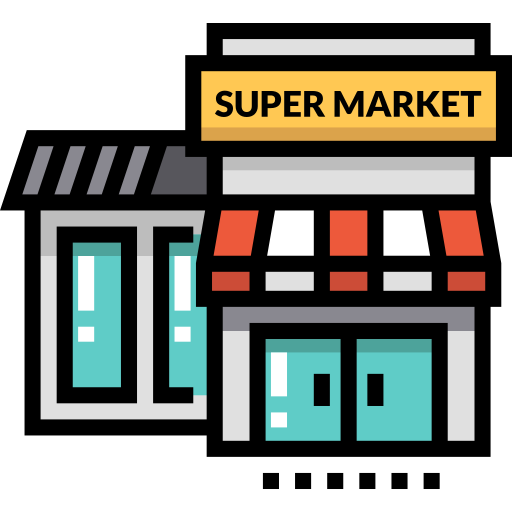

In [3]:
image_path ="C:/Users/Elif/Desktop/supermarket.png"
Image(image_path)

In [4]:
df = pd.read_csv("C:/Users/Elif/Desktop/Global_AI_Proje/supermarket_sales - Sheet1.csv")


In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.shape

(1000, 17)

In [7]:
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [8]:
sütun_adları = df.columns.tolist()
print("Sütun Adları:", sütun_adları)

Sütun Adları: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [9]:
# Sadece sayısal sütunları seçerek açıklayıcı istatistikler hesaplayalım.
numerical_columns = df.select_dtypes(include=['float64'])
numerical_description = numerical_columns.describe()
print(numerical_description)

        Unit price       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130    15.379369   322.966749   307.58738   
std      26.494628    11.708825   245.885335   234.17651   
min      10.080000     0.508500    10.678500    10.17000   
25%      32.875000     5.924875   124.422375   118.49750   
50%      55.230000    12.088000   253.848000   241.76000   
75%      77.935000    22.445250   471.350250   448.90500   
max      99.960000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250  

## Sayısal Değişkenlerin İncelenmesi

Sayısal değişkenlerin dağılımını ve istatistiklerini inceleyebiliriz:

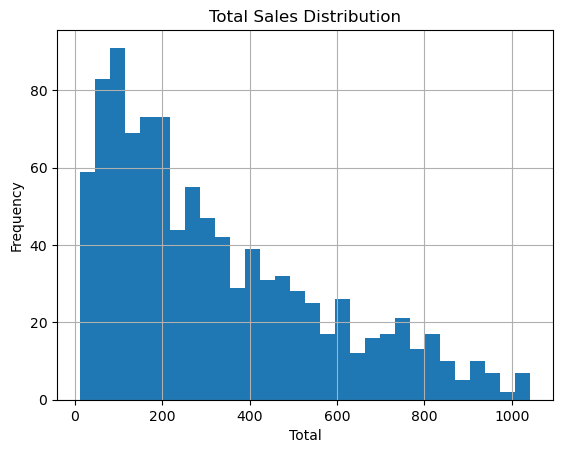

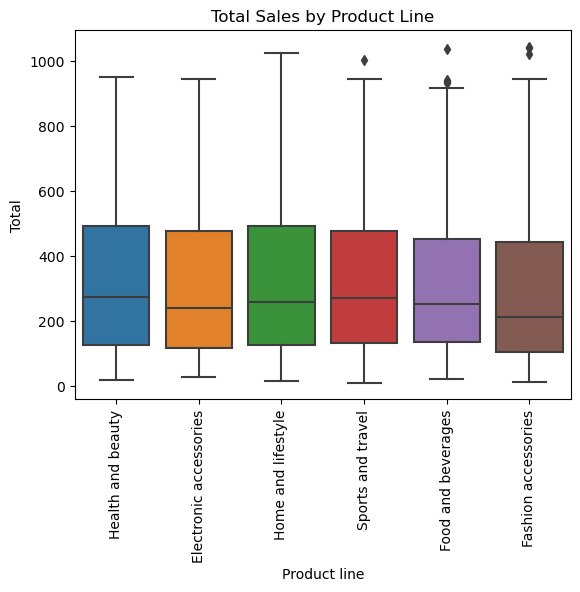

In [14]:
# Histogram çizimi
df['Total'].hist(bins=30)
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Total Sales Distribution')
plt.show()

# Boxplot ile görselleştirme
sns.boxplot(x='Product line', y='Total', data=df)
plt.xticks(rotation=90)
plt.title('Total Sales by Product Line')
plt.show()


## Zaman Değişkenlerinin İncelenmesi

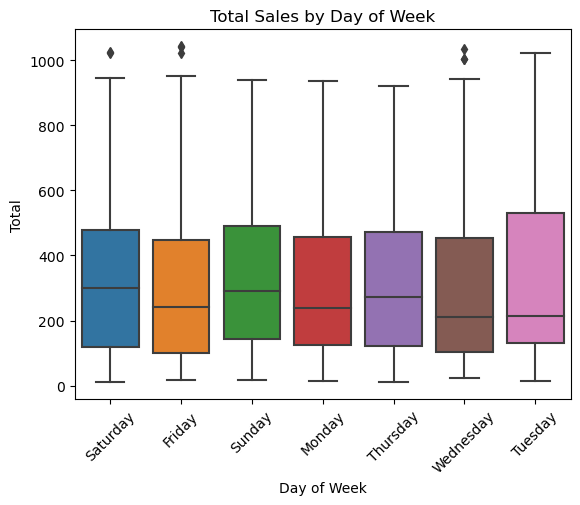

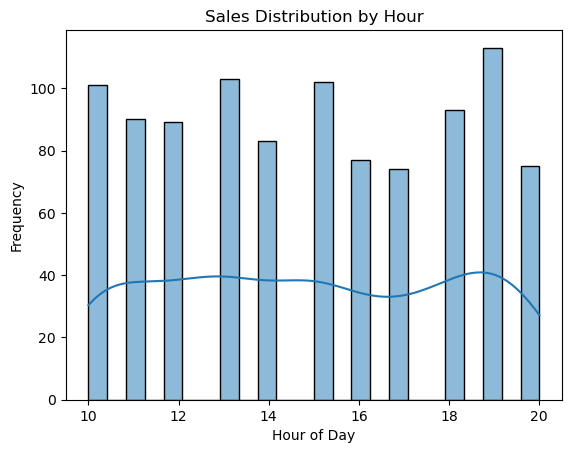

In [17]:
# Tarih sütununu datetime formatına dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Haftanın günlerine göre satış dağılımı
df['Day of Week'] = df['Date'].dt.day_name()
sns.boxplot(x='Day of Week', y='Total', data=df)
plt.xticks(rotation=45)
plt.title('Total Sales by Day of Week')
plt.show()

# Zaman sütununu datetime formatına dönüştürme
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

# Saatlik satış dağılımı
sns.histplot(df['Hour'], bins=24, kde=True)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Sales Distribution by Hour')
plt.show()



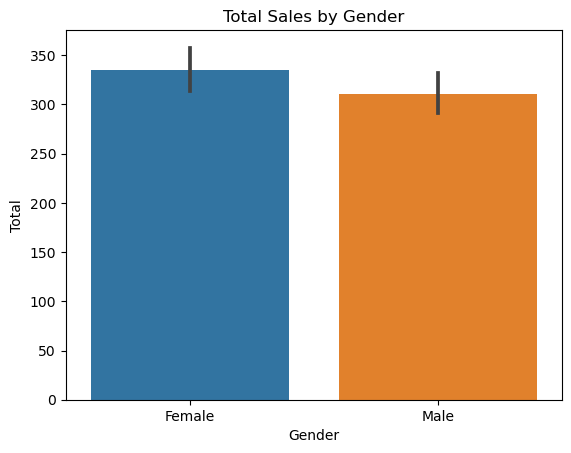

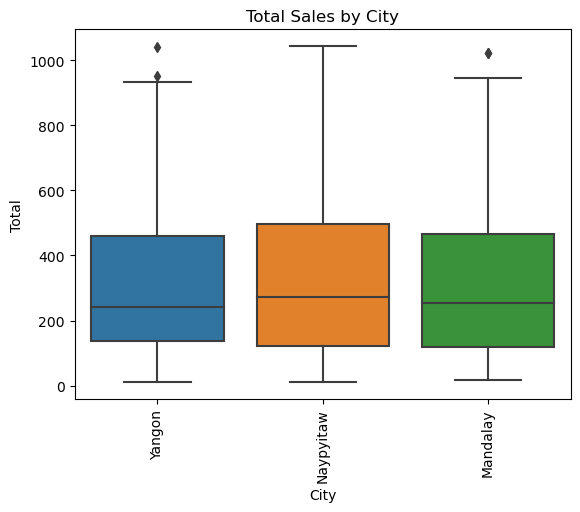

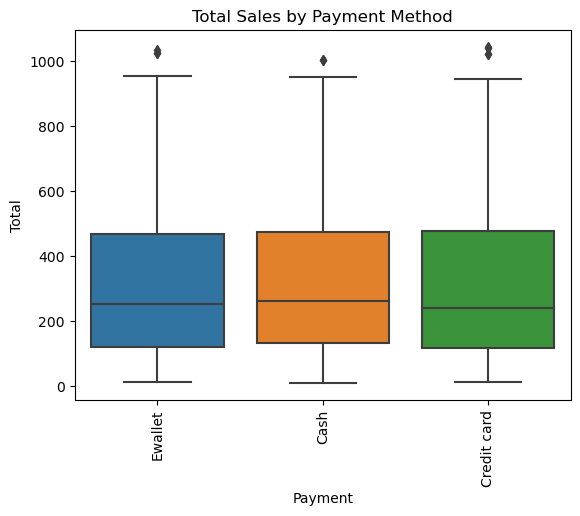

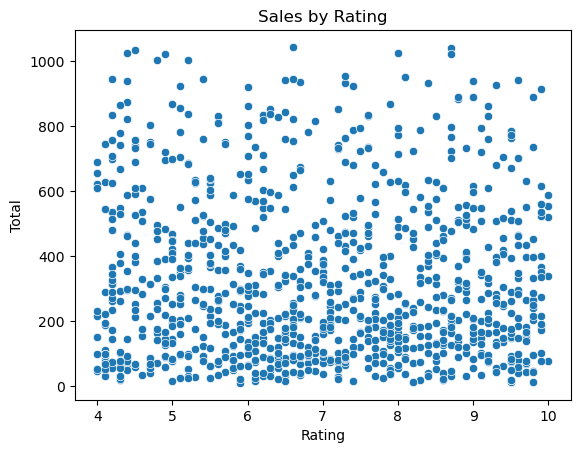

In [19]:
# Toplam satışlara göre cinsiyet dağılımı
sns.barplot(x='Gender', y='Total', data=df)
plt.title('Total Sales by Gender')
plt.show()

# Şehirlere göre satış dağılımı
sns.boxplot(x='City', y='Total', data=df)
plt.xticks(rotation=90)
plt.title('Total Sales by City')
plt.show()

# Ödeme yöntemlerine göre satış dağılımı
sns.boxplot(x='Payment', y='Total', data=df)
plt.xticks(rotation=90)
plt.title('Total Sales by Payment Method')
plt.show()

# Değerlendirme puanlarına göre satış dağılımı
sns.scatterplot(x='Rating', y='Total', data=df)
plt.title('Sales by Rating')
plt.show()


In [10]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

# Veri Seti Hakkında

Bağlam

Nüfusun yoğun olduğu şehirlerde süpermarketlerin büyümesi artmakta ve pazar rekabeti de yüksek olmaktadır. Veri kümesi, süpermarket şirketinin 3 aylık veriler için 3 farklı şubede kaydedilen geçmiş satışlarından biridir. Kestirimci veri analitiği yöntemlerinin bu veri kümesi ile uygulanması kolaydır.

Öznitelik bilgileri

Fatura kimliği: Bilgisayar tarafından oluşturulan satış fişi fa
Şehir Süper merkezlerin konumu

Müşteri tipi: Üye kartı kullanan müşteriler için Üyeler ve üye kartı olmayan müşteriler için Normal tarafından kaydedilen müşteri tipi.

Cinsiyet: Müşterinin cinsiyet tipi

Ürün grubu: Genel ürün kategorizasyon grupları - Elektronik aksesuarlar, Moda aksesuarları, Yiyecek ve içecekler, Sağlık ve güzellik, Ev ve yaşam tarzı, Spor ve seyahat

Birim fiyat: Her bir ürünün $ cinsinden fiyatı

Miktar: Müşteri tarafından satın alınan ürün sayısı

Vergi: Müşteri alımları için %5 vergi ücreti

Toplam: Vergi dahil toplam fiyat

Tarih Satın alma tarihi (Kayıt Ocak 2019'dan Mart 2019'a kadar kullanılabilir)

Zaman: Satın alma zamanı (10am - 9pm)

Ödeme: Müşteri tarafından satın alma için kullanılan ödeme (3 yöntem mevcuttur - Nakit, Kredi kartı ve Ewallet)

COGS: Satılan malların maliyeti

Brüt kar marjı yüzdesi: Brüt kar marjı yüzdesi

Brüt gelir: Brüt gelir

Derecelendirme: Genel alışveriş deneyimlerine ilişkin müşteri katmanlandırma derecelendirmesi (1 ila 10 arasında bir ölçekte)tura kimlik numarası

Şube: Süper merkezin şubesi (A, B ve C ile tanımlanan 3 şube mevcuttur).


# EDA

In [13]:
# Cinsiyet dağılımı
print(df['Gender'].value_counts())

# Ürün hattı dağılımı
print(df['Product line'].value_counts())

# Müşteri tipi dağılımı
print(df['Customer type'].value_counts())

# Şube dağılımı
print(df['Branch'].value_counts())

# Şehir dağılımı
print(df['City'].value_counts())

# Ödeme yöntemi dağılımı
print(df['Payment'].value_counts())


Gender
Female    501
Male      499
Name: count, dtype: int64
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64
Branch
A    340
B    332
C    328
Name: count, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


## Kategorik Özelliklerin Dağılımları

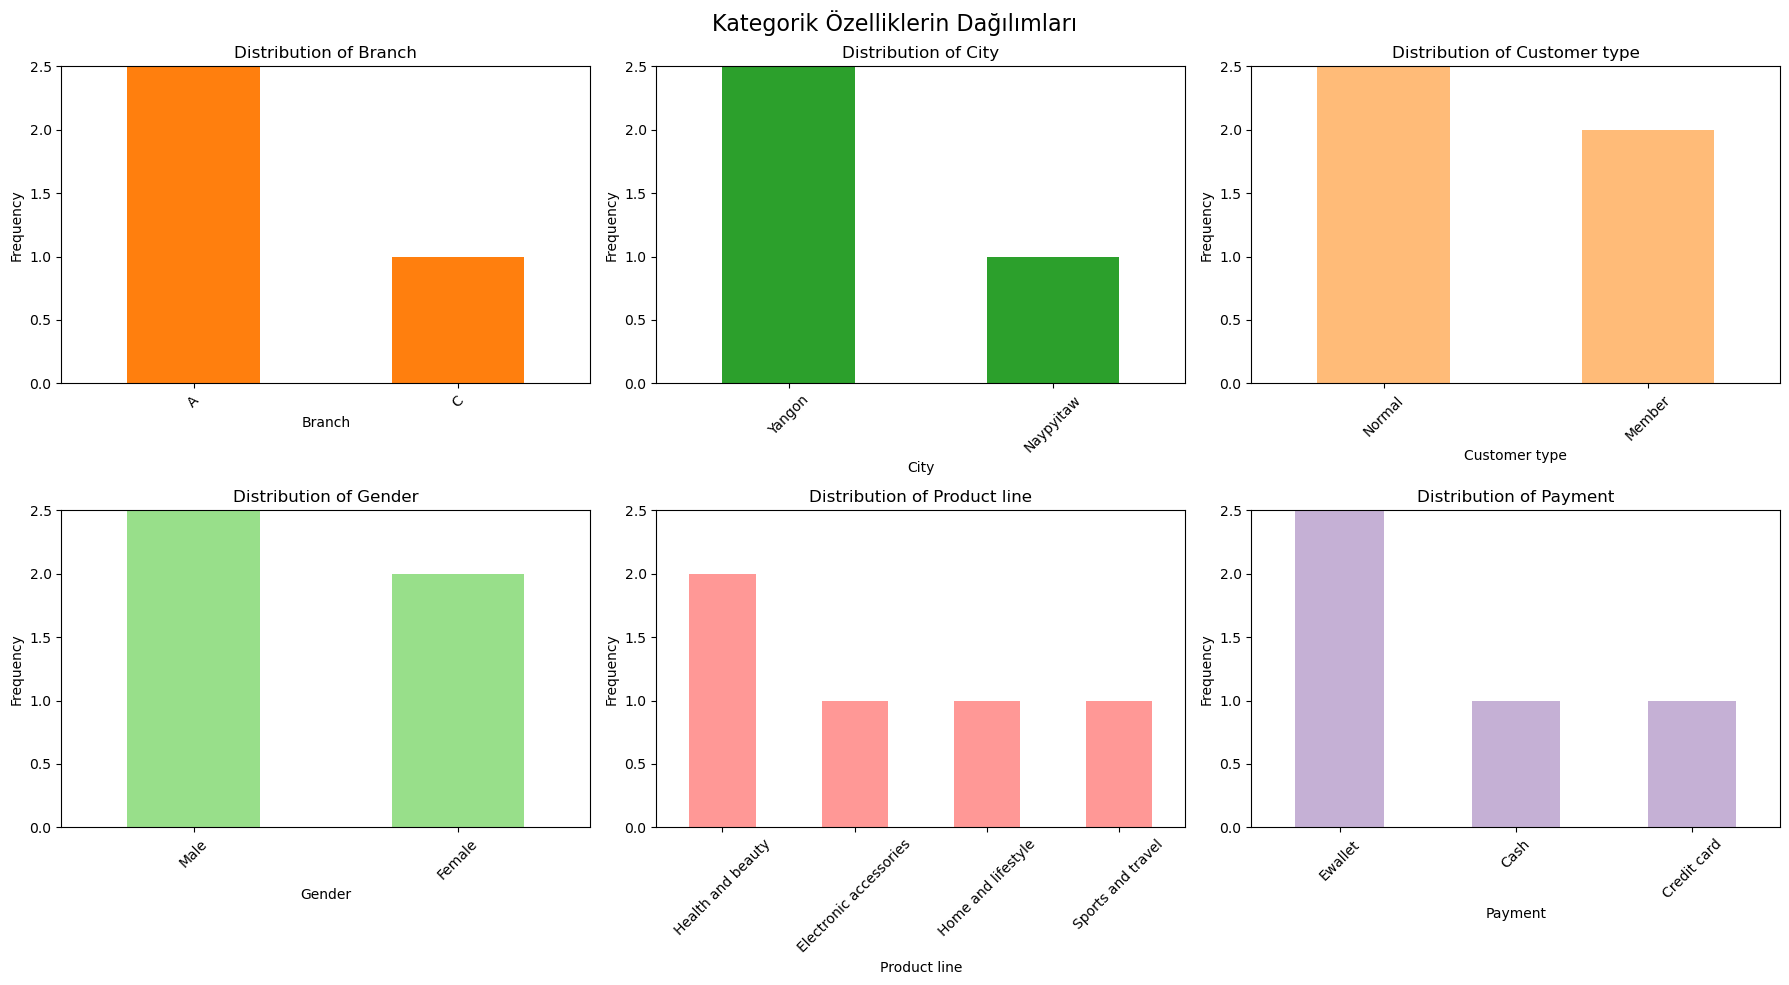

In [12]:
import matplotlib.pyplot as plt

# Kategorik özelliklerin dağılımını inceleyin
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# Yeşil ve turuncu tonları içeren renk paleti
colors = ['#ff7f0e', '#2ca02c', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

# Grafikleri yan yana çıkararak göstermek için subplotlar oluşturun
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Her bir kategorik özelliğin grafiklerini çizin ve başlık ekleyin
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    df[feature].value_counts().plot(kind='bar', color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylim(0, df.shape[0] * 0.5)

# Genel başlık ekleyin
plt.suptitle('Kategorik Özelliklerin Dağılımları', fontsize=16)

# Grafikleri düzenleyin ve gösterin
plt.tight_layout()
plt.show()


## Fiyatın Miktarı Belirlemedeki Rolü: Regresyon Analizi

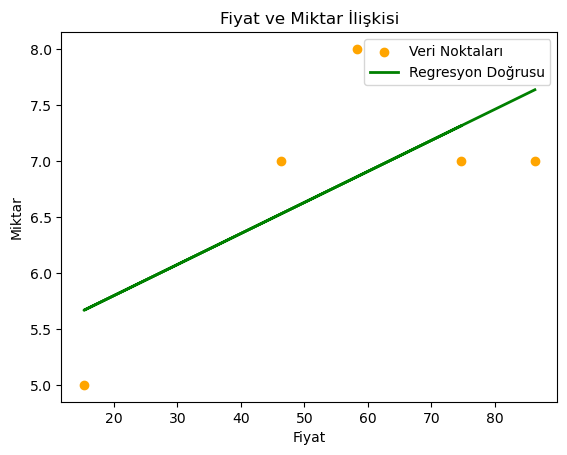

MSE (Mean Squared Error): 0.50
R^2 Score: 0.48


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükleyelim (örnek olarak, df adını kullanalım)
# df isimli DataFrame'inizde 'Unit price' ve 'Quantity' sütunları olduğunu varsayıyoruz
# Eğer gerçek veri setiniz varsa, onu kullanabilirsiniz

# Basit doğrusal regresyon için 'Unit price' ve 'Quantity' sütunlarını kullanalım
X = df[['Unit price']]  # Bağımsız değişken (X)
y = df['Quantity']      # Bağımlı değişken (y)

# Modeli kurup eğitelim
model = LinearRegression()
model.fit(X, y)

# Tahminleri yapalım
y_tahmin = model.predict(X)

# Veriyi ve regresyon doğrusunu görselleştirelim
plt.scatter(X, y, color='orange', label='Veri Noktaları')
plt.plot(X, y_tahmin, color='green', linewidth=2, label='Regresyon Doğrusu')
plt.title('Fiyat ve Miktar İlişkisi')
plt.xlabel('Fiyat')
plt.ylabel('Miktar')
plt.legend()
plt.show()

# Modelin performansını değerlendirelim
mse = mean_squared_error(y, y_tahmin)
r2 = r2_score(y, y_tahmin)
print(f'MSE (Mean Squared Error): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


## Doğrusal Regresyon Analizi Raporu

Bu analiz, 'Fiyat' ile 'Miktar' arasındaki ilişkiyi incelemek için yapılmıştır. Modelin ne kadar iyi olduğunu belirlemek için iki önemli ölçüt kullanılmıştır.

### Ortalama Kare Hata (MSE):
Modelin gerçek değerlerle tahmin ettiği değerler arasındaki ortalama farkı belirler. Düşük MSE, modelin daha iyi tahminler yaptığını gösterir. Bizim modelimiz için MSE değeri 0.50'dir.

### R^2 Skoru:
Modelin ne kadar iyi açıkladığını gösteren bir ölçüdür. Değer ne kadar yüksekse, model o kadar iyi. Bizim modelimiz için R^2 skoru 0.48'dir, yani modelimiz bağımlı değişkenin %48'ini açıklamaktadır.

#### Sonuçlar
Sonuç olarak, modelimiz 'Miktar'ı tahmin etmede oldukça başarılıdır, ancak hala iyileştirme potansiyeli bulunmaktadır. Bu rapor, modelin performansını anlamak için önemli bir bilgi sunar ve gelecekteki iyileştirmeler için bir temel oluşturur.


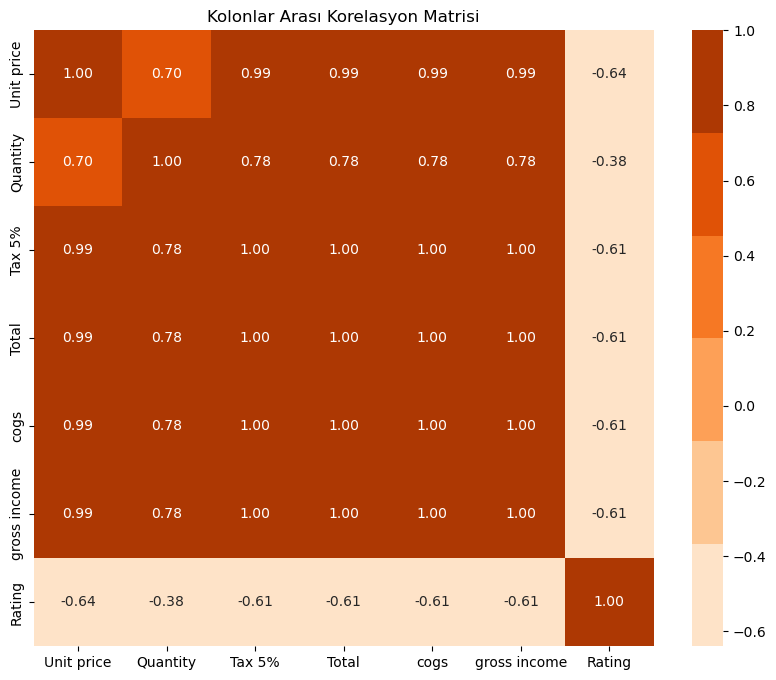

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tüm sayısal sütunları seç
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
correlation_matrix_all = numerical_columns.corr()

# 'gross margin percentage' sütununu çıkar
correlation_matrix_all = correlation_matrix_all.drop('gross margin percentage', axis=0)
correlation_matrix_all = correlation_matrix_all.drop('gross margin percentage', axis=1)

# Renk paletini belirle
cmap = sns.color_palette("Oranges")

# Korelasyon matrisini görselleştir (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap=cmap, fmt=".2f")
plt.title('Kolonlar Arası Korelasyon Matrisi')
plt.show()


## Unit Price ve Total Arasındaki İlişki

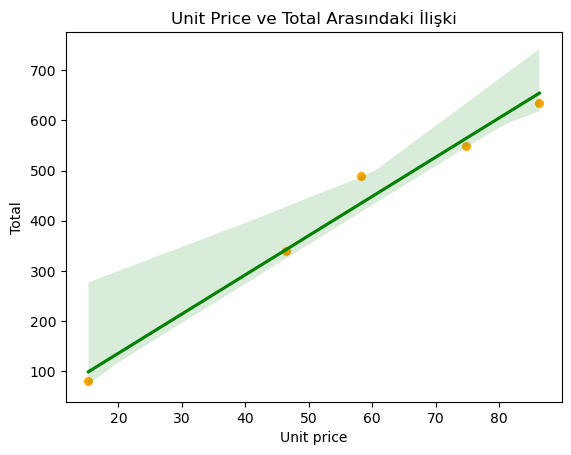

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seçilen sütunları seç
selected_columns = df[['Unit price', 'Total']]

# Nokta grafiğini oluştur
sns.scatterplot(data=selected_columns, x='Unit price', y='Total', color='orange', s=50)  # Nokta boyutu 50
plt.title('Unit Price ve Total Arasındaki İlişki')
plt.xlabel('Unit Price')
plt.ylabel('Total')

# Regresyon doğrusunu ekle
sns.regplot(data=selected_columns, x='Unit price', y='Total', scatter=False, color='green')

plt.show()
